# NYC Property Sales Data Exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Newton\Desktop\DATA\nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Removing all null values

In [4]:
print(df.isnull().sum())

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


Checking datatypes

In [5]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

Dropping data not needed for analysis.

In [6]:
df.drop(columns=['Unnamed: 0','EASE-MENT','APARTMENT NUMBER','LAND SQUARE FEET','GROSS SQUARE FEET','BLOCK','LOT','ZIP CODE'], inplace=True)

Dropping duplicate values

In [7]:
sum(df.duplicated(df.columns))

2242

In [8]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

# Which Borough had the most total unit sales?

In [9]:
df['BOROUGH'] = df['BOROUGH'].apply(str)

In [10]:
df['BOROUGH'] = df['BOROUGH'].replace(['1','2','3','4','5'],['Manhattan','Bronx','Brooklyn','Queens', 'Staten Island'])

In [11]:
Borough = df.groupby('BOROUGH').sum()
totalu = Borough['TOTAL UNITS'].astype(int)
totalu

BOROUGH
Bronx            24513
Brooklyn         52070
Manhattan        46387
Queens           49934
Staten Island    10845
Name: TOTAL UNITS, dtype: int32

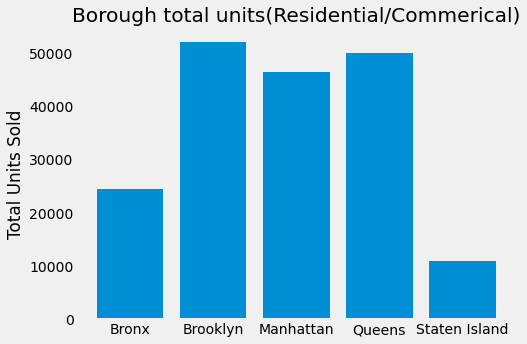

In [12]:
Borough = Borough = [BOROUGH for BOROUGH, df in df.groupby('BOROUGH')]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
plt.bar(Borough,totalu)
plt.grid(False)

plt.title('Borough total units(Residential/Commerical)')
plt.ylabel('Total Units Sold')
plt.show()

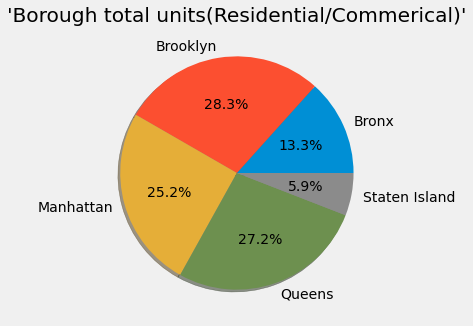

In [13]:
Borough = Borough = [BOROUGH for BOROUGH, df in df.groupby('BOROUGH')]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,5))
plt.title("'Borough total units(Residential/Commerical)'")
plt.pie(totalu, labels=Borough, autopct='%1.1f%%', shadow=True)
plt.show()

# Which neighborhoods had the most units sold in each Borough?

In [14]:
def borough(x):
  return df.groupby('BOROUGH').get_group(x).groupby('NEIGHBORHOOD').sum()['TOTAL UNITS'].sort_values(ascending=False).head(1)

In [15]:
nyc = ['Manhattan','Bronx','Brooklyn','Queens', 'Staten Island']

for x in nyc: 
  print(x),print(borough(x)),print('  ')

Manhattan
NEIGHBORHOOD
HARLEM-CENTRAL    6967
Name: TOTAL UNITS, dtype: int64
  
Bronx
NEIGHBORHOOD
BRONXDALE    2830
Name: TOTAL UNITS, dtype: int64
  
Brooklyn
NEIGHBORHOOD
BEDFORD STUYVESANT    3874
Name: TOTAL UNITS, dtype: int64
  
Queens
NEIGHBORHOOD
FLUSHING-NORTH    4452
Name: TOTAL UNITS, dtype: int64
  
Staten Island
NEIGHBORHOOD
GREAT KILLS    932
Name: TOTAL UNITS, dtype: int64
  


# What was the total sales during 12 months in the entire city?

Inspect the sales price values

In [16]:
df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 82306, dtype: object

Get rid of the space before the values and then the '-' charcter.

In [17]:
df['SALE PRICE'] = df['SALE PRICE'].str.lstrip()
df['SALE PRICE'] = df['SALE PRICE'].str.rstrip()
df= df[df['SALE PRICE'] != '-']
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,153 AVENUE B,5,0,5,1900,2,C2,6625000,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,154 EAST 7TH STREET,10,0,10,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,301 EAST 10TH STREET,6,0,6,1900,2,C2,8000000,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,210 AVENUE B,8,0,8,1920,2,C4,3192840,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,629 EAST 5TH STREET,24,0,24,1920,2,D9,16232000,2016-11-07 00:00:00


Convert into numeric and then datetime to filter out the month

In [18]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])

In [19]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['Month'] = df['SALE DATE'].dt.month

In [20]:
m = df.groupby(['Month'])
x = m['SALE PRICE'].sum()

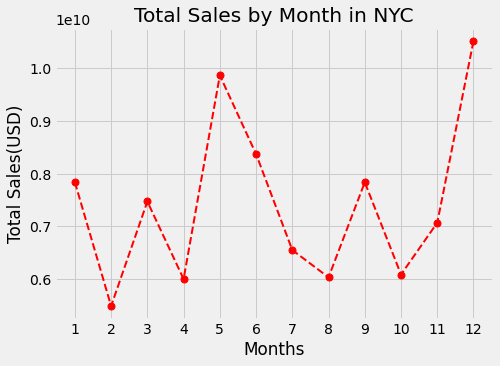

In [21]:
from matplotlib.pyplot import figure
plt.figure(figsize=(7, 5))

months = range(1,13)

plt.plot(months,x, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=7)
plt.xticks(months)
plt.grid(True)

plt.xlabel("Months")
plt.ylabel("Total Sales(USD)")
plt.title("Total Sales by Month in NYC")

plt.show()

# What are the top five building classes?

In [22]:
df['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '46 CONDO STORE BUILDINGS                   ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWELLINGS                  ',
       '04 TAX CLASS 1 CONDOS                      ',
       '21 OFFICE BUILDINGS                        ',
       '23 LOFT BUILDINGS  

In [23]:
df['BUILDING CLASS'] = df['BUILDING CLASS CATEGORY'].str[3:]
del df['BUILDING CLASS CATEGORY']
df.head()

,BOROUGH,NEIGHBORHOOD,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Month,BUILDING CLASS
0,Manhattan,ALPHABET CITY,2A,C2,153 AVENUE B,5,0,5,1900,2,C2,6625000,2017-07-19,7,RENTALS - WALKUP APARTMENTS
3,Manhattan,ALPHABET CITY,2B,C4,154 EAST 7TH STREET,10,0,10,1913,2,C4,3936272,2016-09-23,9,RENTALS - WALKUP APARTMENTS
4,Manhattan,ALPHABET CITY,2A,C2,301 EAST 10TH STREET,6,0,6,1900,2,C2,8000000,2016-11-17,11,RENTALS - WALKUP APARTMENTS
6,Manhattan,ALPHABET CITY,2B,C4,210 AVENUE B,8,0,8,1920,2,C4,3192840,2016-09-23,9,RENTALS - WALKUP APARTMENTS
9,Manhattan,ALPHABET CITY,2,D9,629 EAST 5TH STREET,24,0,24,1920,2,D9,16232000,2016-11-07,11,RENTALS - ELEVATOR APARTMENTS


In [24]:
df['BUILDING CLASS'] = df['BUILDING CLASS'].str.lstrip()

In [25]:
build_group = df.groupby('BUILDING CLASS').sum()
build_ordered = build_group['TOTAL UNITS'].sort_values(ascending=False).head(5)
build_ordered 

BUILDING CLASS
RENTALS - WALKUP APARTMENTS                 29584
TWO FAMILY DWELLINGS                        26709
RENTALS - ELEVATOR APARTMENTS               23133
ONE FAMILY DWELLINGS                        14741
THREE FAMILY DWELLINGS                      10914
Name: TOTAL UNITS, dtype: int64

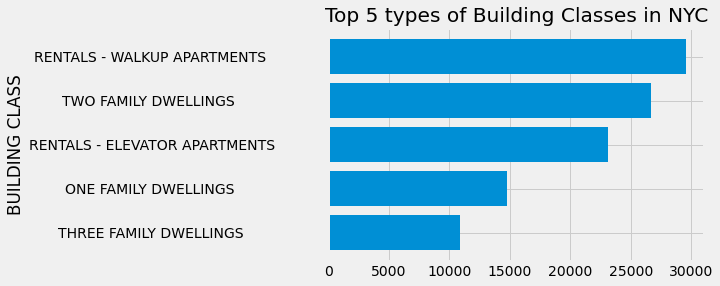

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))

build_ordered.sort_values(ascending=True).plot(kind = 'barh',width = 0.8)

plt.title('Top 5 types of Building Classes in NYC')
plt.show()

# What is the average age of the buildings?

In [27]:
df['YEAR BUILT'].value_counts()

0       5238
1920    4953
1930    4198
1925    3622
1910    3055
        ... 
1883       1
1829       1
1891       1
1855       1
1111       1
Name: YEAR BUILT, Length: 155, dtype: int64

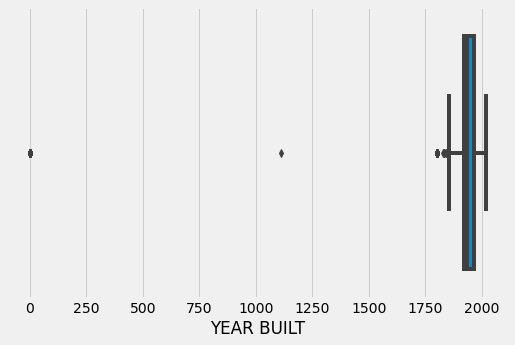

In [28]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.boxplot(x = 'YEAR BUILT', data=df, ax=ax)
plt.show()

Can see outliers outliers from the boxplot. Need to get rid of them.

In [30]:
df = df[df['YEAR BUILT'] >= 1750]

In [31]:
df['YEAR BUILT'].describe()

count    63977.000000
mean      1949.306313
std         34.391373
min       1800.000000
25%       1925.000000
50%       1941.000000
75%       1970.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

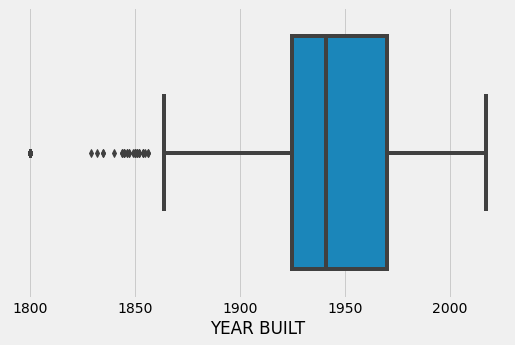

In [32]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.boxplot(x = 'YEAR BUILT', data=df, ax=ax)
plt.show()

In [33]:
df['Building Age'] = 2017 - df['YEAR BUILT']

In [34]:
df['Building Age'].mean()

67.69368679369148

The average age of the buildings is 67.69 years old.